# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [828]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

**[1.2]** Task: Change working directory to /home/jovyan/work

In [829]:
cd /home/jovyan/work

/home/jovyan/work


**[1.3]** Task: Load Processed Data

In [830]:
from src.data.sets import load_sets

In [831]:
load_sets(path='data/processed/', val=False)

(array([[0.35245902, 0.1212976 , 0.13173653, ..., 0.42888889, 0.29393939,
         0.44692737],
        [0.18032787, 0.04231312, 0.03592814, ..., 0.20888889, 0.43636364,
         0.17504655],
        [0.45081967, 0.09026798, 0.08982036, ..., 0.39111111, 0.20606061,
         0.46927374],
        ...,
        [0.43442623, 0.14527504, 0.08682635, ..., 0.23555556, 0.21515152,
         0.33333333],
        [0.45901639, 0.09590973, 0.06586826, ..., 0.30444444, 0.3030303 ,
         0.33705773],
        [0.6557377 , 0.29337094, 0.37724551, ..., 0.43777778, 0.44242424,
         0.36312849]]),
 array([1, 0, 1, ..., 1, 0, 1]),
 array([[0.30327869, 0.12834979, 0.10179641, ..., 0.36888889, 0.19090909,
         0.45996276],
        [0.45081967, 0.25246827, 0.08682635, ..., 0.07555556, 0.12121212,
         0.25698324],
        [0.41803279, 0.07898449, 0.0508982 , ..., 0.25777778, 0.18181818,
         0.37243948],
        ...,
        [0.63114754, 0.42877292, 0.3742515 , ..., 0.28666667, 0.26666667,
 

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [832]:
y_mode = y_train.mode()
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

**[3.2]** Task: Create a numpy array called y_base filled with this value

In [833]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [834]:
from src.models.performance import print_reg_perf

**[3.4]** Task: Display the accuracy score of this baseline model

In [835]:
print_reg_perf(y_train, y_base, set_name="Baseline")

Accuracy Baseline: 0.83359375
RMSE     Baseline: 0.407929221802018
MAE      Baseline: 0.16640625


The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Random Forest - Hyperparameter Tuning with Grid Search and KFold

Train Random Forest Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [836]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [837]:
# Number of trees in random forest
n_estimators = np.linspace(50, 500, int((2000-100)/400) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 100]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [838]:
random_grid

{'n_estimators': array([ 50, 162, 275, 387, 500]),
 'max_depth': [1, 5, 10, 20, 50, 100],
 'min_samples_split': [1, 2, 5, 10, 15, 20],
 'min_samples_leaf': [2, 5, 8],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [839]:
 from sklearn.ensemble import RandomForestClassifier

In [840]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [841]:
# Import Beep
from src.indicator.sounds import beep_when_done

In [842]:
#rf_random.fit(X_train, y_train)

# Beep when completed
#beep_when_done()

#print(rf_random.best_params_)

*print(rf_random.best_params_)*

{'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}

In [843]:
rf_best = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=10, min_samples_leaf=8, max_features=None).fit(X_train, y_train)

In [844]:
print("--- Accuracy Scores Best Fit Model ---")
print_reg_perf(y_train, y_base,                   set_name="Baseline")
print_reg_perf(rf_best.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(rf_best.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy Baseline: 0.83359375
RMSE     Baseline: 0.407929221802018
MAE      Baseline: 0.16640625
Accuracy Train   : 0.85890625
RMSE     Train   : 0.375624480032918
MAE      Train   : 0.14109375
Accuracy Validate: 0.83375
RMSE     Validate: 0.4077376607575023
MAE      Validate: 0.16625


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [845]:
rf_best_1 = RandomForestClassifier(random_state=8, n_estimators=100, max_depth=10, min_samples_leaf=10, max_features=None, class_weight=None).fit(X_train, y_train)

In [846]:
print("--- Accuracy Scores Best Fit Model ---")
print_reg_perf(y_train, y_base,                     set_name="Baseline")
print_reg_perf(rf_best_1.predict(X_train), y_train, set_name="Train   ")
print_reg_perf(rf_best_1.predict(X_val), y_val,     set_name="Validate")

--- Accuracy Scores Best Fit Model ---
Accuracy Baseline: 0.83359375
RMSE     Baseline: 0.407929221802018
MAE      Baseline: 0.16640625
Accuracy Train   : 0.8565625
RMSE     Train   : 0.37873143518857794
MAE      Train   : 0.1434375
Accuracy Validate: 0.8325
RMSE     Validate: 0.40926763859362253
MAE      Validate: 0.1675


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [847]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


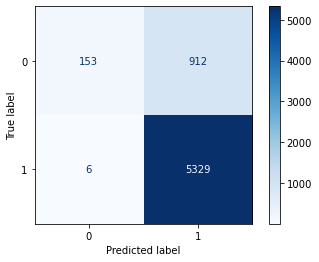

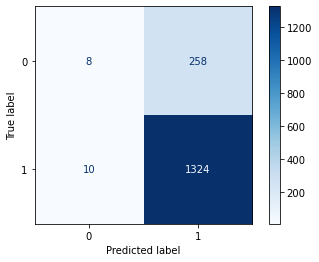

In [848]:
# Plot confusion matrix (with numbers)
plot_confusion_matrix(rf_best_1, X_train, y_train, cmap=plt.cm.Blues)
plot_confusion_matrix(rf_best_1, X_val, y_val, cmap=plt.cm.Blues)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


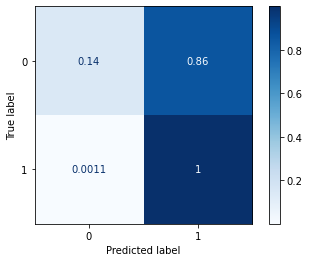

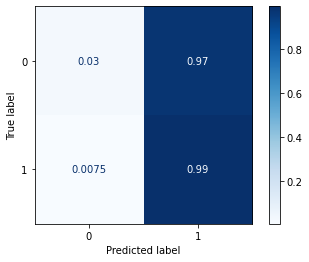

In [849]:
# Plot confusion matrix (with ratios)
plot_confusion_matrix(rf_best_1, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plot_confusion_matrix(rf_best_1, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [850]:
from sklearn.metrics import roc_auc_score

In [851]:
rf_best_1_X_train_proba = rf_best_1.predict_proba(X_train)[:, 1]
rf_best_1_X_val_proba = rf_best_1.predict_proba(X_val)[:, 1]
print("rf_best_1_proba:", rf_best_1_X_train_proba)

rf_best_1_proba: [0.84423352 0.24651894 0.83960159 ... 0.81992902 0.70179499 0.92741714]


In [852]:
roc_auc_score(y_train, rf_best_1_X_train_proba)

0.9228169014084506

In [853]:
roc_auc_score(y_val, rf_best_1_X_val_proba)

0.6794422337703329

**Observations** 
* Training Dataset has a good AUROC prediction.
* Validation Dataset has a poor AUROC prediction. This indicates the model is over-fitting and not working well on unseen data
* The finaly Kaggle result AUROC 0.679 continues this trend
* More work to be done

## 5. Random Forest - Feature Importance

**[5.1]** Task: Print feature importance

In [854]:
rf_best_1.feature_importances_

array([0.22286906, 0.03750991, 0.02773512, 0.01801176, 0.01997252,
       0.08715108, 0.01065063, 0.01958543, 0.03139004, 0.02168692,
       0.02752128, 0.04888101, 0.03033124, 0.0257002 , 0.03721702,
       0.03420871, 0.02092578, 0.01639818, 0.02968393, 0.0181242 ,
       0.01875055, 0.01210669, 0.05509395, 0.0546837 , 0.07381108])

**[5.2]** Task: Create a Data Frame with feature importance values

In [855]:
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': rf_best_1.feature_importances_
     }
     )

**[5.3]** Task: Sort dataframe and reset index

In [856]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[5.4]** Task: Display the first 10 rows of important features

In [857]:
feat_imp_rf_df.head(10)

,feature,feature_importance
0,GP,0.222869
1,FG%,0.087151
2,PER,0.073811
3,PPER,0.055094
4,NPER,0.054684
5,FT%,0.048881
6,MIN,0.037510
7,REB,0.037217
8,AST,0.034209
9,3P%,0.031390


**[5.5]**  Task: Create graph of Feature Importance

In [858]:
import altair as alt

In [859]:
alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

## 6. Random Forest - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [62]:
# Drop Target and ID for X, and create target from y
df_test_id = df_test_cleaned['Id']
X_test = df_test_cleaned.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       3799 non-null   float64
 1   MIN      3799 non-null   float64
 2   PTS      3799 non-null   float64
 3   FGM      3799 non-null   float64
 4   FGA      3799 non-null   float64
 5   FG%      3799 non-null   float64
 6   OREB     3799 non-null   float64
 7   DREB     3799 non-null   float64
 8   REB      3799 non-null   float64
 9   AST      3799 non-null   float64
 10  STL      3799 non-null   float64
 11  TOV      3799 non-null   float64
 12  3P Made  3799 non-null   float64
 13  3PA      3799 non-null   float64
 14  3P%      3799 non-null   float64
 15  FTM      3799 non-null   float64
 16  FTA      3799 non-null   float64
 17  FT%      3799 non-null   float64
 18  BLK      3799 non-null   float64
dtypes: float64(19)
memory usage: 564.0 KB


**[6.3]** Create y Prediction using the Test Dataset

In [72]:
y_predict = rf_best_1.predict_proba(X_test)

In [76]:
print(y_predict)

[[0.26613207 0.73386793]
 [0.30919053 0.69080947]
 [0.11440978 0.88559022]
 ...
 [0.22347663 0.77652337]
 [0.06077046 0.93922954]
 [0.25728307 0.74271693]]


In [77]:
print(y_predict[:,1])

[0.73386793 0.69080947 0.88559022 ... 0.77652337 0.93922954 0.74271693]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [78]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [79]:
y_predict = pd.concat([df_test_id, y_predict], axis=1)

In [80]:
y_predict = y_predict.sort_values(by=['Id'])

In [82]:
print(y_predict)

         Id  TARGET_5Yrs
0         1     0.733868
2         3     0.885590
5         6     0.663792
8        14     0.771546
10       17     0.787609
...     ...          ...
3057  13770     0.881461
3058  13771     0.741607
3059  13774     0.696779
3063  13787     0.724787
3064  13792     0.828467

[3799 rows x 2 columns]


**[6.6]** Export Dataframe to CSV and save model

In [83]:
#joblib.dump(rf_best_1, "../models/nfragar_20220212_random_forest_v1_1.joblib", compress=3)
y_predict.to_csv("../data/external/submission_nfragar_20220212_random_forest_v1_2.csv", index = False)
y_predict.shape

(3799, 2)